In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

In [3]:
tc = pd.read_csv('tc.csv')

In [4]:
X_train, X_test = train_test_split(tc, test_size=0.2, random_state=0)

y_train = X_train['Survived']
y_test = X_test['Survived']

del X_train['Survived']
del X_test['Survived']

best precision score = 0.866
best params: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
accuracy = 0.670
f1_score = 0.306
roc_auc_score = 0.581


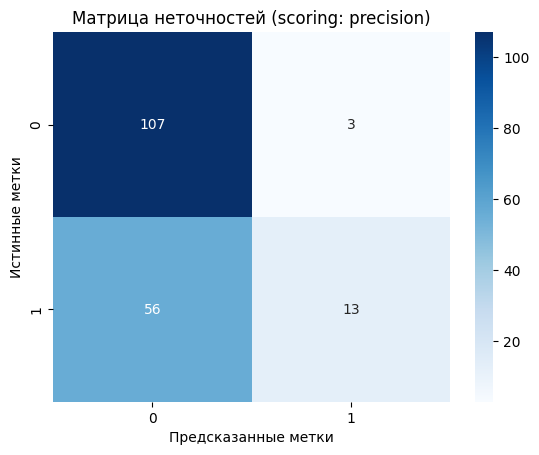

In [5]:
svm_kernel = SVC()
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = [{'C': param_range,
               'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'kernel': ['rbf']}]
gs = GridSearchCV(estimator=svm_kernel,
                  param_grid=param_grid,
                  scoring='precision',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best precision score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

skp_accuracy = clf.score(X_test, y_test)
skp_f1_score = f1_score(y_test, y_pred)
skp_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {skp_accuracy:.3f}')
print(f'f1_score = {skp_f1_score:.3f}')
print(f'roc_auc_score = {skp_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: precision)')
plt.show()

best recall score = 0.714
best params: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
accuracy = 0.821
f1_score = 0.765
roc_auc_score = 0.581


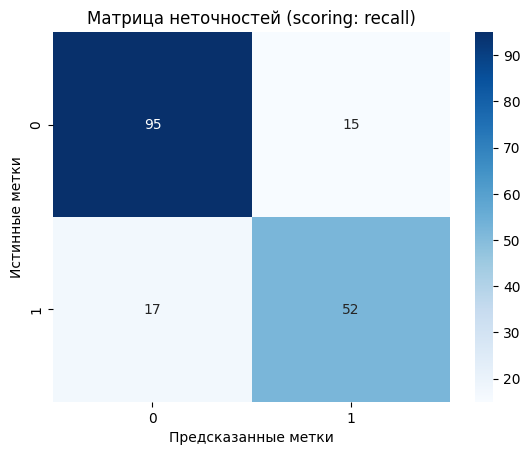

In [6]:
svm_kernel = SVC()
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = [{'C': param_range,
               'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'kernel': ['rbf']}]
gs = GridSearchCV(estimator=svm_kernel,
                  param_grid=param_grid,
                  scoring='recall',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best recall score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

skr_accuracy = clf.score(X_test, y_test)
skr_f1_score = f1_score(y_test, y_pred)
skr_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {skr_accuracy:.3f}')
print(f'f1_score = {skr_f1_score:.3f}')
print(f'roc_auc_score = {skp_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: recall)')
plt.show()

best precision score = 0.750
best params: {'C': 1, 'class_weight': 'balanced', 'kernel': 'linear'}
accuracy = 0.816
f1_score = 0.759
roc_auc_score = 0.804


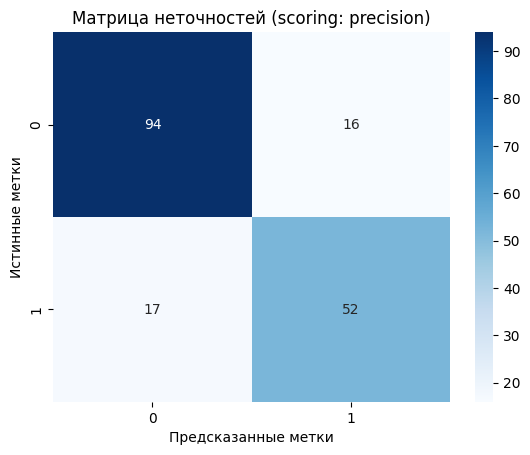

In [7]:
svm_linear = SVC()
param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = [{'C': param_range,
               'kernel': ['linear'],
               'class_weight': ['balanced']}]
gs = GridSearchCV(estimator=svm_linear,
                  param_grid=param_grid,
                  scoring='precision',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best precision score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

slp_accuracy = clf.score(X_test, y_test)
slp_f1_score = f1_score(y_test, y_pred)
slp_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {slp_accuracy:.3f}')
print(f'f1_score = {slp_f1_score:.3f}')
print(f'roc_auc_score = {slp_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: precision)')
plt.show()

best recall score = 0.721
best params: {'C': 10, 'class_weight': 'balanced', 'kernel': 'linear'}
accuracy = 0.799
f1_score = 0.743
roc_auc_score = 0.790


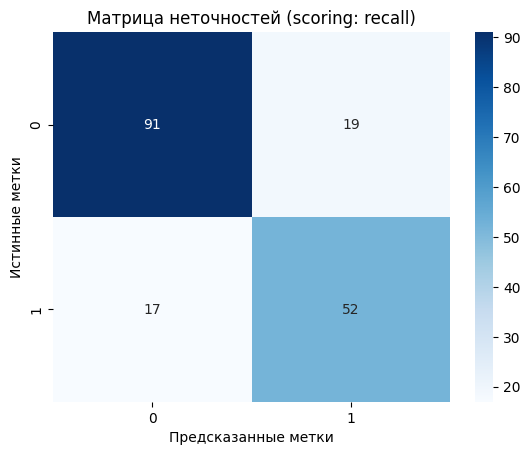

In [8]:
svm_linear = SVC()
param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = [{'C': param_range,
               'kernel': ['linear'],
               'class_weight': ['balanced']}]
gs = GridSearchCV(estimator=svm_linear,
                  param_grid=param_grid,
                  scoring='recall',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best recall score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

slr_accuracy = clf.score(X_test, y_test)
slr_f1_score = f1_score(y_test, y_pred)
slr_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {slr_accuracy:.3f}')
print(f'f1_score = {slr_f1_score:.3f}')
print(f'roc_auc_score = {slr_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: recall)')
plt.show()

(0.6, 0.9)

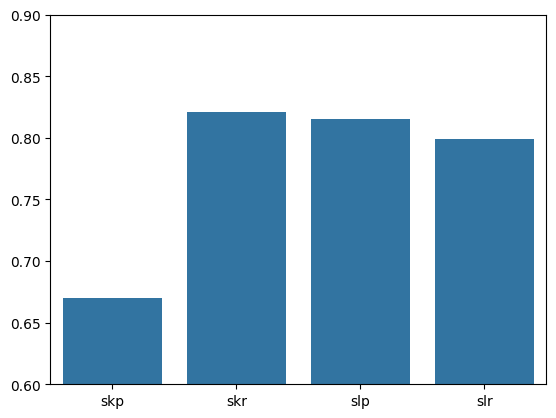

In [9]:
sns.barplot(x=['skp', 'skr', 'slp', 'slr'], y=[skp_accuracy, skr_accuracy, slp_accuracy, slr_accuracy])
plt.ylim(0.6, 0.9)

(0.3, 0.8)

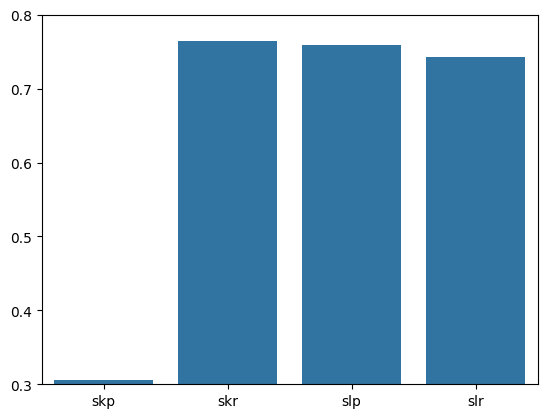

In [10]:
sns.barplot(x=['skp', 'skr', 'slp', 'slr'], y=[skp_f1_score, skr_f1_score, slp_f1_score, slr_f1_score])
plt.ylim(0.3, 0.8)

(0.5, 0.85)

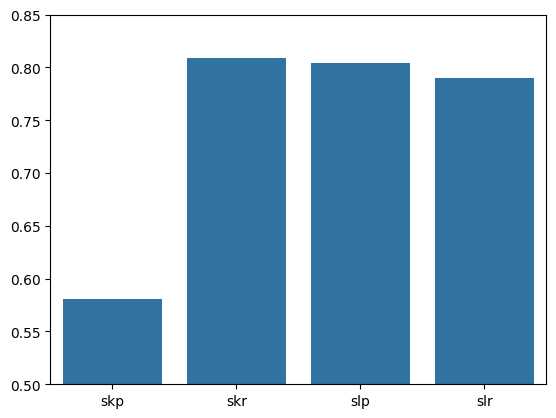

In [11]:
sns.barplot(x=['skp', 'skr', 'slp', 'slr'], y=[skp_roc, skr_roc, slp_roc, slr_roc])
plt.ylim(0.5, 0.85)